In [1]:
#importamos los paquetes necesarios
import consultas as cst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import time
import math
import datetime as dt

In [ ]:
#importante buscar query que sale casi al final de este cuaderno es el que inserta datos a la tabla de ruleteros

## <span style="font-size: 15pt;">ANALISIS TABLA JINETES</span>


In [ ]:
#QUERY QUE DA EL TOTAL DE LA TABLA 
query=f'''
SELECT COUNT(*) 
FROM WOM_AA_CLIENTE_DK_JINETE
'''
322245
query=f'''
SELECT count(distinct(cliente_dk))
FROM WOM_AA_CLIENTE_DK_JINETE
'''
94945

In [ ]:
#QUERY QUE DA EL TOTAL DE VECES QUE SALE UN CLIENTE 
query=f'''
SELECT VECES_JINETE,COUNT(*) AS TOTAL
FROM(
SELECT CLIENTE_DK,
       COUNT(*) AS VECES_JINETE
FROM WOM_AA_CLIENTE_DK_JINETE
GROUP BY CLIENTE_DK
) GROUP BY VECES_JINETE
ORDER BY VECES_JINETE
'''


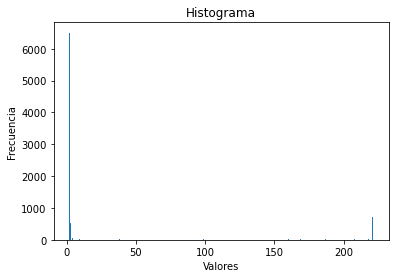

In [3]:
#histograma de veces cliente 
import matplotlib.pyplot as plt

# Datos proporcionados
data = [
    (1, 86599), (2, 6501), (3, 526), (4, 56), (5, 8), (6, 9), (7, 9), (9, 10), (11, 3), (12, 2),
    (13, 1), (14, 3), (15, 4), (16, 1), (17, 2), (18, 1), (19, 5), (20, 1), (21, 2), (22, 1),
    (23, 3), (24, 3), (25, 1), (26, 1), (27, 3), (29, 5), (31, 1), (32, 1), (34, 5), (35, 6),
    (38, 16), (39, 1), (40, 3), (41, 5), (44, 1), (45, 2), (47, 4), (48, 1), (49, 2), (50, 1),
    (52, 1), (53, 3), (54, 1), (55, 6), (56, 2), (57, 2), (58, 1), (60, 4), (61, 3), (62, 5),
    (65, 4), (66, 7), (68, 5), (69, 4), (70, 1), (72, 2), (73, 3), (75, 7), (79, 1), (80, 5),
    (81, 5), (82, 1), (83, 3), (85, 2), (86, 4), (87, 2), (88, 1), (90, 4), (93, 3), (94, 2),
    (98, 1), (99, 10), (100, 6), (101, 2), (102, 1), (103, 4), (105, 6), (106, 1), (108, 4),
    (109, 4), (110, 6), (112, 1), (114, 3), (115, 3), (117, 2), (120, 4), (121, 3), (122, 1),
    (123, 2), (124, 7), (125, 1), (128, 1), (129, 6), (130, 6), (131, 2), (132, 9), (133, 1),
    (135, 1), (136, 3), (137, 1), (141, 4), (142, 1), (143, 5), (146, 5), (148, 1), (151, 4),
    (152, 1), (154, 2), (156, 3), (157, 1), (158, 1), (159, 1), (160, 14), (161, 8), (162, 2),
    (163, 7), (164, 1), (165, 6), (166, 3), (168, 1), (169, 11), (170, 2), (171, 2), (173, 6),
    (174, 3), (175, 1), (177, 1), (178, 5), (181, 3), (183, 5), (184, 9), (187, 13), (188, 1),
    (189, 3), (190, 2), (192, 1), (193, 6), (195, 4), (197, 1), (198, 5), (200, 3), (201, 2),
    (202, 2), (203, 7), (204, 3), (205, 1), (208, 11), (209, 2), (211, 3), (212, 4), (213, 4),
    (214, 3), (215, 1), (218, 18), (219, 6), (220, 2), (221, 713)
]

# Separar datos en x (valores) e y (frecuencia)
x = [item[0] for item in data]
y = [item[1] for item in data]

# Crear el histograma
plt.bar(x, y)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()


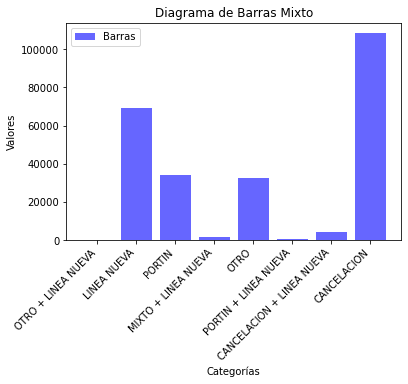

In [5]:
#SEGUN TIPO DE JINETE
# Datos proporcionados
categorias = [
     'OTRO + LINEA NUEVA', 'LINEA NUEVA', 'PORTIN',
    'MIXTO + LINEA NUEVA', 'OTRO', 'PORTIN + LINEA NUEVA',
    'CANCELACION + LINEA NUEVA', 'CANCELACION'
]

valores_barras = [ 259, 69033, 33980, 1378, 32386, 344, 4173, 108409]



# Crear el gráfico de barras
plt.bar(categorias, valores_barras, color='b', alpha=0.6, label='Barras')



# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Diagrama de Barras Mixto')

# Mostrar leyenda
plt.legend()

# Rotar etiquetas en el eje x para mayor legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()


In [2]:
#QUERY QUE TRAE LA BASE 
query=f'''
SELECT A.*,B.*,C.*,D.*,COALESCE(A.FECHA_BAJA,A.FECHA_ALTA)-A.FECHA_ALTA AS ANTIGUEDAD
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
LEFT JOIN DWH_BODEGA_WOM.DIM_PLANES B ON A.PLAN_COMERCIAL_DK=B.PLAN_COMERCIAL_DK
LEFT JOIN DWH_BODEGA_WOM.DIM_CONSULTORES C ON A.CONSULTOR_DK=C.CONSULTOR_DK
LEFT JOIN DWH_BODEGA_WOM.DIM_CLIENTES D ON A.CLIENTE_DK=D.CLIENTE_DK
WHERE A.CLIENTE_DK IN (SELECT DISTINCT(CLIENTE_DK)
FROM WOM_AA_CLIENTE_DK_JINETE)
AND A.MOVIMIENTO_NOMBRE IN ('ACTIVACION','DESCONEXION')
'''
base=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
base.to_csv('base_jinetes.csv')

In [5]:
#CUANTOS ACTIVOS Y DE QUE SERVICIO
base.groupby(['MOVIMIENTO_NOMBRE','SERVICIO']).count()


PERIODO_PROCESO_CODIGO  TIEMPO_DK  CLIENTE_DK  \
MOVIMIENTO_NOMBRE SERVICIO                                                  
ACTIVACION        Postpaid                  285847     285847      285847   
                  Prepaid                    69100      69100       69100   
DESCONEXION       Postpaid                  235149     235149      235149   
                  Prepaid                    52849      52849       52849   

                            OFERTA_DK  PLAN_COMERCIAL_DK  CONSULTOR_DK  \
MOVIMIENTO_NOMBRE SERVICIO                                               
ACTIVACION        Postpaid     285847             285847        285847   
                  Prepaid       69100              69100         69100   
DESCONEXION       Postpaid     235149             235149        235149   
                  Prepaid       52849              52849         52849   

                            EQUIPO_DK  MODELO_DK  BODEGA_DK  GEOGRAFIA_DK  \
MOVIMIENTO_NOMBRE SERVICIO                                                  
ACTIVACION        Postpaid     285847     285847     285847        285847   
                  Prepaid       69100      69100      69100         69100   
DESCONEXION       Postpaid     235149     235149     235149        235149   
                  Prepaid       52849      52849      52849         52849   

                            ...  CLIENTE_EMPLEADOS  CLIENTE_TIPO  \
MOVIMIENTO_NOMBRE SERVICIO  ...                                    
ACTIVACION        Postpaid  ...             285847        285847   
                  Prepaid   ...              69100         69100   
DESCONEXION       Postpaid  ...             235149        235149   
                  Prepaid   ...              52849         52849   

                            CLIENTE_TIER  CLIENTE_VIGENCIA  CLIENTE_INI_VIG  \
MOVIMIENTO_NOMBRE SERVICIO                                                    
ACTIVACION        Postpaid        285847            285847           285847   
                  Prepaid          69100             69100            69100   
DESCONEXION       Postpaid        235149            235149           235149   
                  Prepaid          52849             52849            52849   

                            CLIENTE_FIN_VIG  FECHA_DWH  \
MOVIMIENTO_NOMBRE SERVICIO                               
ACTIVACION        Postpaid                0     285847   
                  Prepaid                 0      69100   
DESCONEXION       Postpaid                0     235149   
                  Prepaid                 0      52849   

                            CLIENTE_TIPO_DOCUMENTO  CLIENTE_NOMBRADO  \
MOVIMIENTO_NOMBRE SERVICIO                                             
ACTIVACION        Postpaid                  285847            285847   
                  Prepaid                    69100             69100   
DESCONEXION       Postpaid                  235149            235149   
                  Prepaid                    52849             52849   

                            ANTIGUEDAD  
MOVIMIENTO_NOMBRE SERVICIO              
ACTIVACION        Postpaid      285847  
                  Prepaid        69100  
DESCONEXION       Postpaid      235149  
                  Prepaid        52849  

[4 rows x 141 columns]

DESCONEXION	Postpaid	235149
ACTIVACION	Postpaid	285847
DESCONEXION	Prepaid	    52849
ACTIVACION	Prepaid	    69100

SEGUN ESTO EN POSPAGO HAY 50698 Y EN PREPAGO 16251 QUE ESTAN ACTIVOS EN LA BASE 

In [35]:
df_filtrado = base[(base['MOVIMIENTO_NOMBRE'] == 'ACTIVACION') & (base['SERVICIO'] == 'Postpaid')]

In [48]:
df_filtrado = base[(base['MOVIMIENTO_NOMBRE'] == 'ACTIVACION') ]

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df

# Aplica el filtro
df_filtrado = df[(df['movimiento_nombre'] == 'desconexion') & (df['servicio'] == 'pospago')]


In [45]:
df_filtrado.describe()

,PERIODO_PROCESO_CODIGO,TIEMPO_DK,CLIENTE_DK,OFERTA_DK,PLAN_COMERCIAL_DK,CONSULTOR_DK,EQUIPO_DK,MODELO_DK,BODEGA_DK,GEOGRAFIA_DK,SUBSCRIBER_ID,ORGANIZACION_ID,STAFF_ID,CUENTA_CODIGO,REVENUE,CANTIDAD,DESCONEXION_TEMPORAL_DIAS,PLAN_COMERCIAL_DK,PLAN_MARCACION_GROSS,PLAN_PRECARGADO,CONSULTOR_DK,CONSULTOR_VIGENCIA,CLIENTE_DK,CLIENTE_CODIGO_NK,CLIENTE_EDAD,ANTIGUEDAD
count,285847.000000,2.858470e+05,2.858470e+05,285847.0,2.858470e+05,2.858470e+05,285847.0,285847.0,285847.0,285847.0,2.858470e+05,285847.000000,285811.000000,2.842790e+05,285537.000000,285847.0,120.000000,2.858470e+05,285847.000000,285847.0,2.858470e+05,285847.000000,2.858470e+05,2.858470e+05,285847.000000,285847.000000
mean,202208.491350,2.022087e+07,2.572112e+09,-1.0,3.938709e+05,5.285868e+06,-1.0,-1.0,-1.0,-1.0,1.766506e+09,6654.271142,17177.113148,1.685020e+08,40341.074502,1.0,6.925000,3.938709e+05,0.999997,0.0,5.285868e+06,0.189734,2.572112e+09,4.309240e+07,11.256781,0.619465
std,75.067199,7.506426e+03,3.230663e+09,0.0,4.826327e+05,2.011691e+06,0.0,0.0,0.0,0.0,5.477972e+08,3724.118285,11295.077341,5.008261e+07,11256.743434,0.0,6.109866,4.826327e+05,0.001870,0.0,2.011691e+06,0.392092,3.230663e+09,7.945822e+07,33.311438,3.397559
min,202104.000000,2.021041e+07,5.325724e+06,-1.0,4.998000e+04,-2.000000e+00,-1.0,-1.0,-1.0,-1.0,1.925586e+08,1.000000,1.000000,1.109629e+08,25000.000000,1.0,1.000000,4.998000e+04,0.000000,0.0,-2.000000e+00,0.000000,5.325724e+06,9.137313e+06,-1.000000,-27.967396
25%,202111.000000,2.021112e+07,1.847871e+08,-1.0,5.000600e+04,5.766611e+06,-1.0,-1.0,-1.0,-1.0,1.214626e+09,3096.000000,7576.000000,1.219623e+08,35000.000000,1.0,4.000000,5.000600e+04,1.000000,0.0,5.766611e+06,0.000000,1.847871e+08,1.225929e+07,0.000000,0.000000
50%,202207.000000,2.022073e+07,9.496190e+08,-1.0,1.375410e+05,6.106709e+06,-1.0,-1.0,-1.0,-1.0,1.449162e+09,6801.000000,15484.000000,1.334905e+08,35500.000000,1.0,4.000000,1.375410e+05,1.000000,0.0,6.106709e+06,0.000000,9.496190e+08,1.449116e+07,0.000000,0.000000
75%,202302.000000,2.023021e+07,4.009905e+09,-1.0,1.089091e+06,6.589067e+06,-1.0,-1.0,-1.0,-1.0,2.308891e+09,9921.000000,24206.000000,2.213984e+08,45000.000000,1.0,9.000000,1.089091e+06,1.000000,0.0,6.589067e+06,0.000000,4.009905e+09,1.809066e+07,24.000000,0.000000
max,202310.000000,2.023101e+07,1.355141e+10,-1.0,2.339358e+06,7.047741e+06,-1.0,-1.0,-1.0,-1.0,2.522530e+09,18019.000000,204832.000000,2.376169e+08,100000.000000,1.0,29.000000,2.339358e+06,1.000000,0.0,7.047741e+06,1.000000,1.355141e+10,1.225332e+09,2017.000000,31.119722


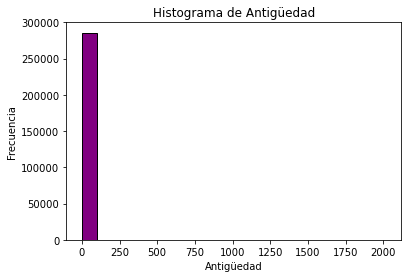

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# Y deseas hacer un histograma de la columna "antiguedad"
# Puedes utilizar el siguiente código:

# Selecciona la columna "antiguedad" y elimina los valores nulos si los hay
antiguedad_data = df_filtrado['CLIENTE_EDAD'].dropna()

# Crea el histograma
plt.hist(antiguedad_data, bins=20, edgecolor='k',color='purple')  # Puedes ajustar el número de bins según tus preferencias

# Etiquetas y título
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Antigüedad')

# Muestra el histograma
plt.show()


In [16]:
df_filtrado.describe()

,PERIODO_PROCESO_CODIGO,TIEMPO_DK,CLIENTE_DK,OFERTA_DK,PLAN_COMERCIAL_DK,CONSULTOR_DK,EQUIPO_DK,MODELO_DK,BODEGA_DK,GEOGRAFIA_DK,...,DESCONEXION_TEMPORAL_DIAS,PLAN_COMERCIAL_DK,PLAN_MARCACION_GROSS,PLAN_PRECARGADO,CONSULTOR_DK,CONSULTOR_VIGENCIA,CLIENTE_DK,CLIENTE_CODIGO_NK,CLIENTE_EDAD,ANTIGUEDAD
count,235149.00000,2.351490e+05,2.351490e+05,235149.0,2.351490e+05,2.351490e+05,235149.0,235149.0,235149.0,235149.0,...,0.0,2.351490e+05,235149.000000,235149.0,2.351490e+05,235149.000000,2.351490e+05,2.351490e+05,235149.000000,235149.000000
mean,202224.48297,2.021974e+07,2.404703e+09,-1.0,3.398108e+05,5.078303e+06,-1.0,-1.0,-1.0,-1.0,...,NaN,3.398108e+05,0.999877,0.0,5.078303e+06,0.176195,2.404703e+09,3.984599e+07,11.208476,101.368464
std,72.57766,7.236055e+03,3.092661e+09,0.0,4.241211e+05,2.075444e+06,0.0,0.0,0.0,0.0,...,NaN,4.241211e+05,0.011105,0.0,2.075444e+06,0.380987,3.092661e+09,7.398150e+07,32.250293,107.715267
min,202104.00000,2.021041e+07,5.325724e+06,-1.0,4.998000e+04,-2.000000e+00,-1.0,-1.0,-1.0,-1.0,...,NaN,4.998000e+04,0.000000,0.0,-2.000000e+00,0.000000,5.325724e+06,9.137313e+06,-1.000000,-20.913113
25%,202202.00000,2.021101e+07,1.738729e+08,-1.0,5.000600e+04,4.361143e+06,-1.0,-1.0,-1.0,-1.0,...,NaN,5.000600e+04,1.000000,0.0,4.361143e+06,0.000000,1.738729e+08,1.222283e+07,0.000000,32.070590
50%,202209.00000,2.022061e+07,8.351209e+08,-1.0,1.375390e+05,5.868899e+06,-1.0,-1.0,-1.0,-1.0,...,NaN,1.375390e+05,1.000000,0.0,5.868899e+06,0.000000,8.351209e+08,1.431150e+07,0.000000,60.643495
75%,202304.00000,2.022122e+07,3.658858e+09,-1.0,2.514020e+05,6.511759e+06,-1.0,-1.0,-1.0,-1.0,...,NaN,2.514020e+05,1.000000,0.0,6.511759e+06,0.000000,3.658858e+09,1.772047e+07,24.000000,140.144688
max,202310.00000,2.023101e+07,1.355141e+10,-1.0,2.339358e+06,7.047608e+06,-1.0,-1.0,-1.0,-1.0,...,NaN,2.339358e+06,1.000000,0.0,7.047608e+06,1.000000,1.355141e+10,1.225332e+09,2017.000000,912.032269


In [30]:
pd.options.display.max_columns = False

In [37]:
df_filtrado.columns

Index(['PERIODO_PROCESO_CODIGO', 'TIEMPO_DK', 'CLIENTE_DK', 'OFERTA_DK',
       'PLAN_COMERCIAL_DK', 'CONSULTOR_DK', 'EQUIPO_DK', 'MODELO_DK',
       'BODEGA_DK', 'GEOGRAFIA_DK',
       ...
       'CLIENTE_EMPLEADOS', 'CLIENTE_TIPO', 'CLIENTE_TIER', 'CLIENTE_VIGENCIA',
       'CLIENTE_INI_VIG', 'CLIENTE_FIN_VIG', 'FECHA_DWH',
       'CLIENTE_TIPO_DOCUMENTO', 'CLIENTE_NOMBRADO', 'ANTIGUEDAD'],
      dtype='object', length=143)

In [46]:
df_filtrado.groupby(['CONSULTOR_NOMBRE_NIVEL_8']).count()

,PERIODO_PROCESO_CODIGO,TIEMPO_DK,CLIENTE_DK,OFERTA_DK,PLAN_COMERCIAL_DK,CONSULTOR_DK,EQUIPO_DK,MODELO_DK,BODEGA_DK,GEOGRAFIA_DK,SUBSCRIBER_ID,SUBSCRIBER_ANT_ID,ORGANIZACION_ID,STAFF_ID,MSISDN,SIMCARD,IMEI,IMSI,CICLO_FACTURACION,SERVICIO,ESTADO,FACTURA_ID,FACTURA_FECHA,CUENTA_CODIGO,ORDEN_CODIGO,MOVIMIENTO_NOMBRE,MOVIMIENTO_TIPO_NOMBRE,MOVIMIENTO_TIPO_NOMBRE_DET,OPERADOR_PORTA_ORIGEN,OPERADOR_PORTA_DESTINO,ANEXO_CODIGO_AVA,ANEXO_FECHA_GROSS_AVA,COMISIONABLE,FECHA_ALTA,FECHA_BAJA,REVENUE,CANTIDAD,PROCESO,FECHA_CARGA_DWH,CAUSAL_DESCONEXION,...,CONSULTOR_USUARIO_NIVEL_2,CONSULTOR_NOMBRE_NIVEL_2,CONSULTOR_DOCUMENTO_NIVEL_2,CONSULTOR_USUARIO_NIVEL_1,CONSULTOR_NOMBRE_NIVEL_1,CONSULTOR_DOCUMENTO_NIVEL_1,CONSULTOR_VIGENCIA,CONSULTOR_FECHA_INI_VIG,CONSULTOR_FECHA_FIN_VIG,FECHA_DWH,CLIENTE_DK,CLIENTE_CODIGO_NK,CLIENTE_NOMBRE,CLIENTE_NIT_CEDULA,CLIENTE_NATURALEZA,CLIENTE_GENERO,CLIENTE_FECHA_NACIMIENTO,CLIENTE_EDAD,CLIENTE_FECHA_ALTA,CLIENTE_CIUDAD,CLIENTE_REGIONAL,CLIENTE_CONTACTO_NOMBRE,CLIENTE_CONTACTO_TELEFONO,CLIENTE_DIRECCION_PPAL,CLIENTE_DIRECCION_CIUDAD,CLIENTE_DIRECCION_DPTO,CLIENTE_EMAIL,CLIENTE_ESTADO,CLIENTE_OCUPACION,CLIENTE_INDUSTRIA,CLIENTE_EMPLEADOS,CLIENTE_TIPO,CLIENTE_TIER,CLIENTE_VIGENCIA,CLIENTE_INI_VIG,CLIENTE_FIN_VIG,FECHA_DWH,CLIENTE_TIPO_DOCUMENTO,CLIENTE_NOMBRADO,ANTIGUEDAD
CONSULTOR_NOMBRE_NIVEL_8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-,19,19,19,19,19,19,19,19,19,19,19,0,19,19,19,19,0,0,19,19,19,19,19,19,19,19,19,1,17,17,0,0,19,19,0,19,19,19,19,0,...,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,10,19,19,19,19,0,1,19,19,19,19,19,19,19,19,19,19,19,19,0,19,19,19,19
-1,36,36,36,36,36,36,36,36,36,36,36,0,36,0,36,36,0,0,35,36,36,36,36,36,36,36,36,0,15,15,0,0,36,36,2,36,36,36,36,0,...,36,36,36,36,36,36,36,36,0,36,36,36,36,36,36,36,8,36,36,36,36,0,8,36,36,36,36,36,36,36,36,36,36,36,36,0,36,36,36,36
-2,271,271,271,271,271,271,271,271,271,271,271,0,271,271,271,271,0,0,270,271,271,99,91,271,268,271,271,20,60,60,0,0,271,271,67,263,271,271,271,0,...,271,271,271,271,271,271,271,271,0,271,271,271,271,271,271,271,41,271,271,269,269,0,110,271,269,269,271,271,271,271,271,271,271,271,271,0,271,271,271,271
ACOL SAS,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6,0,0,6,6,6,6,6,6,6,6,6,1,6,6,0,0,6,6,0,6,6,6,6,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,4,6,6,6,6,0,4,6,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6
AGUIRRE SOLANO S.A.S,47,47,47,47,47,47,47,47,47,47,47,0,47,47,47,47,0,0,47,47,47,44,44,47,47,47,47,10,29,29,0,0,47,47,3,47,47,47,47,0,...,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,6,47,47,47,47,0,6,47,47,47,47,47,47,47,47,47,47,47,47,0,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jhorman alonso toro arias,217,217,217,217,217,217,217,217,217,217,217,0,217,217,217,215,0,0,215,217,217,197,197,215,217,217,217,22,121,121,0,0,217,217,4,217,217,217,217,0,...,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,50,217,217,216,216,0,54,217,216,216,217,217,217,217,217,217,217,217,217,0,217,217,217,217
juan gabriel gomez zapata,147,147,147,147,147,147,147,147,147,147,147,0,147,147,147,146,0,0,145,147,147,146,146,145,147,147,147,3,70,70,0,0,147,147,6,147,147,147,147,0,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,26,147,147,147,147,0,18,147,147,147,147,147,147,147,147,147,147,147,147,0,147,147,147,147
julio miguel acosta tapia,311,311,311,311,311,311,311,311,311,311,311,0,311,311,311,310,0,0,311,311,311,232,232,311,311,311,311,84,88,88,0,0,311,311,10,311,311,311,311,0,...,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,39,311,311,310,310,0,32,311,310,310,311,311,311,311,311,311,311,311,311,0,311,311,311,311


In [55]:
df_ordenado=df_filtrado.groupby(['CONSULTOR_REGIONAL_NOMBRE']).count()

In [56]:
df_ordenado.sort_values(by='PERIODO_PROCESO_CODIGO', ascending=False).head(10)

,PERIODO_PROCESO_CODIGO,TIEMPO_DK,CLIENTE_DK,OFERTA_DK,PLAN_COMERCIAL_DK,CONSULTOR_DK,EQUIPO_DK,MODELO_DK,BODEGA_DK,GEOGRAFIA_DK,SUBSCRIBER_ID,SUBSCRIBER_ANT_ID,ORGANIZACION_ID,STAFF_ID,MSISDN,SIMCARD,IMEI,IMSI,CICLO_FACTURACION,SERVICIO,ESTADO,FACTURA_ID,FACTURA_FECHA,CUENTA_CODIGO,ORDEN_CODIGO,MOVIMIENTO_NOMBRE,MOVIMIENTO_TIPO_NOMBRE,MOVIMIENTO_TIPO_NOMBRE_DET,OPERADOR_PORTA_ORIGEN,OPERADOR_PORTA_DESTINO,ANEXO_CODIGO_AVA,ANEXO_FECHA_GROSS_AVA,COMISIONABLE,FECHA_ALTA,FECHA_BAJA,REVENUE,CANTIDAD,PROCESO,FECHA_CARGA_DWH,CAUSAL_DESCONEXION,...,CONSULTOR_USUARIO_NIVEL_2,CONSULTOR_NOMBRE_NIVEL_2,CONSULTOR_DOCUMENTO_NIVEL_2,CONSULTOR_USUARIO_NIVEL_1,CONSULTOR_NOMBRE_NIVEL_1,CONSULTOR_DOCUMENTO_NIVEL_1,CONSULTOR_VIGENCIA,CONSULTOR_FECHA_INI_VIG,CONSULTOR_FECHA_FIN_VIG,FECHA_DWH,CLIENTE_DK,CLIENTE_CODIGO_NK,CLIENTE_NOMBRE,CLIENTE_NIT_CEDULA,CLIENTE_NATURALEZA,CLIENTE_GENERO,CLIENTE_FECHA_NACIMIENTO,CLIENTE_EDAD,CLIENTE_FECHA_ALTA,CLIENTE_CIUDAD,CLIENTE_REGIONAL,CLIENTE_CONTACTO_NOMBRE,CLIENTE_CONTACTO_TELEFONO,CLIENTE_DIRECCION_PPAL,CLIENTE_DIRECCION_CIUDAD,CLIENTE_DIRECCION_DPTO,CLIENTE_EMAIL,CLIENTE_ESTADO,CLIENTE_OCUPACION,CLIENTE_INDUSTRIA,CLIENTE_EMPLEADOS,CLIENTE_TIPO,CLIENTE_TIER,CLIENTE_VIGENCIA,CLIENTE_INI_VIG,CLIENTE_FIN_VIG,FECHA_DWH,CLIENTE_TIPO_DOCUMENTO,CLIENTE_NOMBRADO,ANTIGUEDAD
CONSULTOR_REGIONAL_NOMBRE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Regional Centro,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,0,209132,209132,209132,208705,0,0,206159,209132,209132,196605,188432,208321,209078,209132,209132,38664,126505,126504,1,1,208405,209132,10451,206547,209132,209132,209132,76,...,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,209132,59757,209132,209132,209019,209019,0,92680,209132,209019,209019,209132,209132,209132,209132,209132,209132,209132,209132,209132,0,209132,209132,209132,209132
Regional Costa,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,0,34944,34944,34944,34843,0,0,34263,34944,34944,34061,32429,34708,34935,34944,34944,1866,15826,15826,0,0,34728,34944,1290,33800,34944,34944,34944,16,...,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,34944,9260,34944,34944,34912,34912,0,8526,34944,34912,34912,34944,34944,34944,34944,34944,34944,34944,34944,34944,0,34944,34944,34944,34944
Regional Antioquia,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,0,32988,32988,32988,32919,0,0,32351,32988,32988,31920,29502,32848,32967,32988,32988,2697,16958,16958,0,0,32810,32988,1542,31837,32988,32988,32988,15,...,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,32988,8920,32988,32988,32962,32962,0,9555,32988,32962,32962,32988,32988,32988,32988,32988,32988,32988,32988,32988,0,32988,32988,32988,32988
Regional Oriente,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,0,26940,26940,26940,26876,0,0,26405,26940,26940,25764,23851,26699,26929,26940,26940,2447,13986,13986,0,0,26813,26940,859,26082,26940,26940,26940,8,...,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,26940,7466,26940,26940,26885,26885,0,6067,26940,26885,26885,26940,26940,26940,26940,26940,26940,26940,26940,26940,0,26940,26940,26940,26940
Regional Occidente,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,0,19867,19867,19867,19821,0,0,19577,19867,19867,18978,17876,19762,19864,19867,19867,1258,9343,9343,0,0,19740,19867,754,19130,19867,19867,19867,3,...,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,19867,6446,19867,19867,19832,19832,0,4655,19867,19832,19832,19867,19867,19867,19867,19867,19867,19867,19867,19867,0,19867,19867,19867,19867
Regional Bogota,17717,17717,17717,17717,17717,17717,17717,17717,17717,17717,17717,0,17717,17717,17717,17717,0,0,17709,17717,17717,15482,14614,17705,17714,17717,17717,3911,11479,11479,0,0,

In [34]:
df_filtrado.groupby(['OPERADOR_PORTA_ORIGEN','OPERADOR_PORTA_DESTINO']).count().tail(50)

PERIODO_PROCESO_CODIGO  ...  ANTIGUEDAD
OPERADOR_PORTA_ORIGEN OPERADOR_PORTA_DESTINO                          ...            
FLASH                 TIGO                                        40  ...          40
                      VIRGIN                                       2  ...           2
                      WOM                                         30  ...          30
                      Wom                                         54  ...          54
MEGAMOVIL             COMCEL                                       9  ...           9
                      TELEFONICA                                   7  ...           7
                      TIGO                                        11  ...          11
                      WOM                                          4  ...           4
                      Wom                                         16  ...          16
RONIN                 COMCEL                                       1  ...           1
SUMA                  COMCEL                                       5  ...           5
                      SUMA                                         4  ...           4
                      TELEFONICA                                   2  ...           2
                      TIGO                                         6  ...           6
                      VIRGIN                                       2  ...           2
                      WOM                                          2  ...           2
                      Wom                                          4  ...           4
TELEFONICA            AVANTEL                                      2  ...           2
                      COMCEL                                    2601  ...        2601
                      ETB                                        169  ...         169
                      EXITO                                       12  ...          12
                      FLASH                                        5  ...           5
                      SUMA                                         6  ...           6
                      TELEFONICA                                7682  ...        7682
                      TIGO                                      2183  ...        2183
                      VIRGIN                                     128  ...         128
                      WOM                                        758  ...         758
                      Wom                                       2530  ...        2530
TIGO                  AVANTEL                                      1  ...           1
                      COMCEL                                    2528  ...        2528
                      ETB                                        164  ...         164
                      EXITO                                       17  ...          17
                      FLASH                                        8  ...           8
                      SUMA                                         2  ...           2
                      TELEFONICA                                3767  ...        3767
                      TIGO                                      6172  ...        6172
                      VIRGIN                                     202  ...         202
                      WOM                                        895  ...         895
                      Wom                                       3299  ...        3299
UFF                   COMCEL                                       2  ...           2
VIRGIN                COMCEL                                     329  ...         329
                      ETB                                         30  ...          30
                      EXITO                                        8  ...           8
                      FLASH                                        1  ...           1
                      SUMA                                         3  ...           3
    

In [27]:
df_filtrado

,PERIODO_PROCESO_CODIGO,TIEMPO_DK,CLIENTE_DK,OFERTA_DK,PLAN_COMERCIAL_DK,CONSULTOR_DK,EQUIPO_DK,MODELO_DK,BODEGA_DK,GEOGRAFIA_DK,...,CLIENTE_EMPLEADOS,CLIENTE_TIPO,CLIENTE_TIER,CLIENTE_VIGENCIA,CLIENTE_INI_VIG,CLIENTE_FIN_VIG,FECHA_DWH,CLIENTE_TIPO_DOCUMENTO,CLIENTE_NOMBRADO,ANTIGUEDAD
2,202212,20221220,5394640,-1,50006,5772621,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0
6,202208,20220803,5394640,-1,249078,6110641,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0
7,202201,20220128,5394640,-1,50006,5772621,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0
9,202109,20210922,5394640,-1,50000,825773,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0
10,202104,20210414,5394640,-1,50006,823918,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642939,202305,20230516,9831103873,-1,1224049,6803450,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE EXTRANJERIA,SI,0.0
642940,202304,20230424,9831103873,-1,1089095,6781610,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE EXTRANJERIA,SI,0.0
642941,202303,20230302,9831103873,-1,1089094,6755442,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE EXTRANJERIA,SI,0.0
642943,202309,20230902,13101215885,-1,1090116,7025916,-1,-1,-1,-1,...,0,Sin Clasificar,Sin Clasificar,1,1900-01-01,None,2023-10-13 04:34:25,CEDULA DE CIUDADANIA,SI,0.0


In [2]:
#QUERY QUE DA LAS PORTACIONES DE NUESTRO ENDING 
query=f'''
SELECT  PERIODO_PROCESO_CODIGO AS PERIODO,
        CASE 
              WHEN MOVIMIENTO_TIPO_NOMBRE='CHURN PORTACION' THEN FECHA_BAJA
              ELSE FECHA_ALTA
        END AS CREATED_DATE,
        MSISDN AS PORT_NUMBER,
        CASE 
            WHEN MOVIMIENTO_TIPO_NOMBRE='CHURN PORTACION' THEN OPERADOR_DESTINO_C
            ELSE 'WOM'
        END AS OPERATOR_HOLDER ,
        CASE 
            WHEN MOVIMIENTO_TIPO_NOMBRE='CHURN PORTACION' THEN 'WOM'
            ELSE OPERADOR_ORIGEN_C
        END AS OPERATOR_DONOR
FROM ( 
SELECT A.* , 
       CASE 
            WHEN A.OPERADOR_PORTA_ORIGEN='MEGAMOVIL' THEN 'MEGAMOVIL'
            WHEN A.OPERADOR_PORTA_ORIGEN='AVANTEL' THEN 'AVANTEL S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='EXITO' THEN 'EXITO INVERSIONES S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='COMCEL' THEN 'CLARO'
            WHEN A.OPERADOR_PORTA_ORIGEN='TELEFONICA' THEN 'MOVISTAR'
            WHEN A.OPERADOR_PORTA_ORIGEN='VIRGIN' THEN 'VIRGIN MOBILE COLOMBIA S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='FLASH' THEN 'LOGISTICA FLASH COLOMBIA S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='ETB' THEN 'ETB MOVIL'
            WHEN A.OPERADOR_PORTA_ORIGEN='SUMA' THEN 'SUMA MOVIL S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='SUMA' THEN 'SUMA MOVIL S.A.'
            WHEN A.OPERADOR_PORTA_ORIGEN='WOM' THEN 'WOM'
            WHEN A.OPERADOR_PORTA_ORIGEN='TIGO' THEN 'COLOMBIA MOVIL S.A (TIGO)'
            WHEN A.OPERADOR_PORTA_ORIGEN IS NULL THEN 'NULO'
       END AS OPERADOR_ORIGEN_C,
       CASE
            WHEN A.OPERADOR_PORTA_DESTINO='MEGAMOVIL' THEN 'MEGAMOVIL'
            WHEN A.OPERADOR_PORTA_DESTINO='AVANTEL' THEN 'AVANTEL S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='EXITO' THEN 'EXITO INVERSIONES S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='COMCEL' THEN 'CLARO'
            WHEN A.OPERADOR_PORTA_DESTINO='TELEFONICA' THEN 'MOVISTAR'
            WHEN A.OPERADOR_PORTA_DESTINO='VIRGIN' THEN 'VIRGIN MOBILE COLOMBIA S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='FLASH' THEN 'LOGISTICA FLASH COLOMBIA S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='ETB' THEN 'ETB MOVIL'
            WHEN A.OPERADOR_PORTA_DESTINO='SUMA' THEN 'SUMA MOVIL S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='SUMA' THEN 'SUMA MOVIL S.A.'
            WHEN A.OPERADOR_PORTA_DESTINO='WOM' THEN 'WOM'
            WHEN A.OPERADOR_PORTA_DESTINO='TIGO' THEN 'COLOMBIA MOVIL S.A (TIGO)'
            WHEN A.OPERADOR_PORTA_DESTINO IS NULL THEN 'NULO'
       END AS OPERADOR_DESTINO_C
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A 
WHERE A.PERIODO_PROCESO_CODIGO>=202201
AND A.MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS PORTACION','CHURN PORTACION') )
'''
portacion_wom=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
portacion_wom.to_csv('portacion_wom.csv')

In [ ]:
#QUERY QUE DA EL TOTAL DE LA TABLA 


In [ ]:
#query que da lso clientes dk que ya teniamos marcados compo jineteros y que son de portacion 
query=f'''
SELECT DISTINCT(CLIENTE_DK) 
FROM WOM_AA_CLIENTE_DK_JINETE
WHERE CLIENTE_DK IN (
SELECT DISTINCT(CLIENTE_DK) AS CLIENTE_DK 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTA
FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER
HAVING COUNT(*) >=4 
)
))
'''


In [7]:
#ANTIGUEDAD ACTIVOS EN BASE 
query=f'''
SELECT ROUND(ROUND(TO_DATE(20231001,'YYYY/MM/DD')-FECHA_ALTA,0)/30,1) AS ANTIGUEDAD 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTA
FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER
HAVING COUNT(*) >=4 
))
AND PERIODO_PROCESO_CODIGO=202309
AND MOVIMIENTO_NOMBRE IN ('ACTIVACION','PERMANECE')
AND SERVICIO='Postpaid'

'''
antiguedad_jin_activo=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


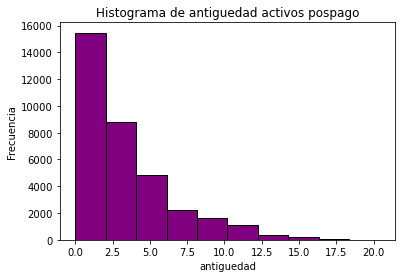

,ANTIGUEDAD
count,34740.000000
mean,3.316292
std,3.145465
min,0.000000
25%,0.900000
50%,2.500000
75%,4.600000
max,20.400000


In [8]:
plt.hist(antiguedad_jin_activo['ANTIGUEDAD'], bins=10, color='purple', edgecolor='black')
plt.xlabel('antiguedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de antiguedad activos pospago')
plt.show()
antiguedad_jin_activo.describe()

In [9]:
#ANTIGUEDAD SE HAN IDO 
query=f'''
SELECT ROUND(ROUND(FECHA_BAJA-FECHA_ALTA,0)/30,1) AS ANTIGUEDAD 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTA
FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER
HAVING COUNT(*) >=4 
))
AND MOVIMIENTO_NOMBRE IN ('DESCONEXION')

'''
antiguedad_jin_inactivo=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


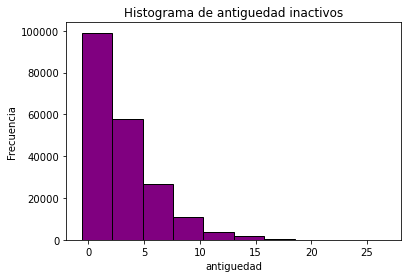

,ANTIGUEDAD
count,200537.000000
mean,3.161843
std,2.893610
min,-0.600000
25%,1.000000
50%,2.200000
75%,4.400000
max,26.700000


In [10]:
plt.hist(antiguedad_jin_inactivo['ANTIGUEDAD'], bins=10, color='purple', edgecolor='black')
plt.xlabel('antiguedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de antiguedad inactivos')
plt.show()
antiguedad_jin_inactivo.describe()

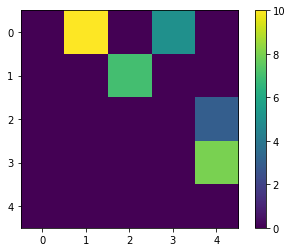

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una matriz de 5x5 con diagonales 0
matrix = np.zeros((5, 5))

# Llena la matriz con valores de flujo (por ejemplo)
matrix[0, 1] = 10
matrix[0, 3] = 5
matrix[1, 2] = 7
matrix[2, 4] = 3
matrix[3, 4] = 8

# Crea un gráfico de matriz
plt.imshow(matrix, cmap='viridis', origin='upper')

# Agrega una barra de colores para mostrar los valores
plt.colorbar()

# Etiquetas de filas y columnas
plt.xticks(range(5))
plt.yticks(range(5))

# Mostrar el gráfico
plt.show()


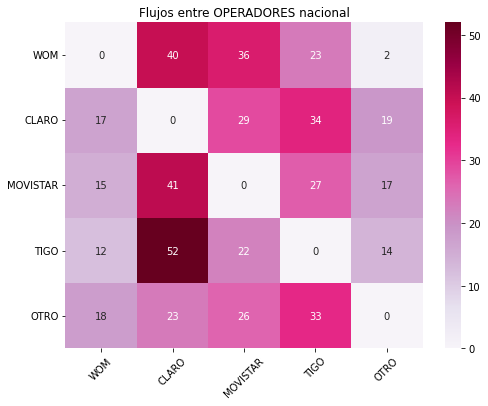

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define la matriz de porcentajes
data = np.array([
    [0, 40, 36, 23, 2],
    [17, 0, 29, 34, 19],
    [15, 41, 0, 27, 17],
    [12, 52, 22, 0, 14],
    [18, 23, 26, 33, 0]
])

# Define las etiquetas de filas y columnas
rows = ["WOM", "CLARO", "MOVISTAR", "TIGO", "OTRO"]
cols = ["WOM", "CLARO", "MOVISTAR", "TIGO", "OTRO"]

# Crea un DataFrame con las etiquetas
df = pd.DataFrame(data, index=rows, columns=cols)

# Crea un mapa de calor con colores violetas
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="PuRd", fmt=".0f")

# Configuración de las etiquetas
plt.xticks(np.arange(len(cols)) + 0.5, cols, rotation=45)
plt.yticks(np.arange(len(rows)) + 0.5, rows, rotation=0)

# Título
plt.title("Flujos entre OPERADORES nacional")

# Mostrar el mapa de calor
plt.show()



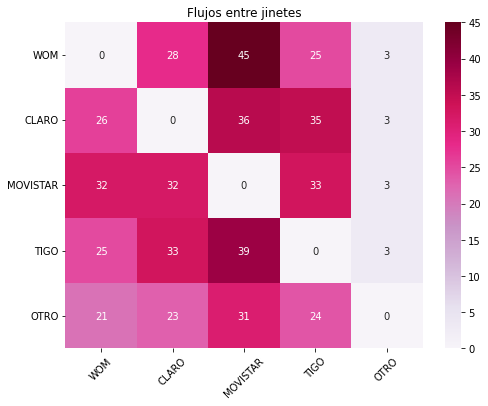

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define un mapa de colores personalizado con tonos de violeta más oscuros


# Define la matriz de porcentajes
data = np.array([
    [0, 28, 45, 25, 3],
    [26, 0, 36, 35, 3],
    [32, 32, 0, 33, 3],
    [25, 33, 39, 0, 3],
    [21, 23, 31, 24, 0]
])

# Define las etiquetas de filas y columnas
rows = ["WOM", "CLARO", "MOVISTAR", "TIGO", "OTRO"]
cols = ["WOM", "CLARO", "MOVISTAR", "TIGO", "OTRO"]

# Crea un DataFrame con las etiquetas
df = pd.DataFrame(data, index=rows, columns=cols)

# Crea un mapa de calor con el mapa de colores personalizado
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="PuRd", fmt=".0f")

# Configuración de las etiquetas
plt.xticks(np.arange(len(cols)) + 0.5, cols, rotation=45)
plt.yticks(np.arange(len(rows)) + 0.5, rows, rotation=0)

# Título
plt.title("Flujos entre jinetes")

# Mostrar el mapa de calor
plt.show()



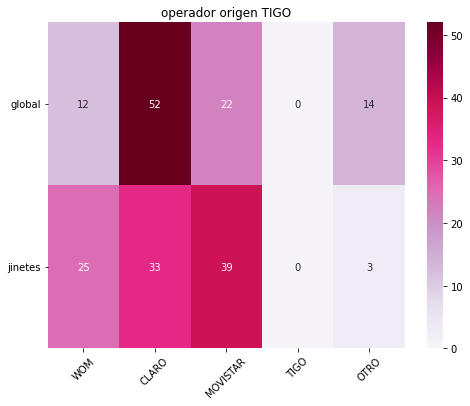

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define un mapa de colores personalizado con tonos de violeta más oscuros


# Define la matriz de porcentajes
data = np.array([
    [12,52,22,0,14],
    [25,33,39,0,3]
])

# Define las etiquetas de filas y columnas
rows = ["global", "jinetes"]
cols = ["WOM", "CLARO", "MOVISTAR", "TIGO", "OTRO"]

# Crea un DataFrame con las etiquetas
df = pd.DataFrame(data, index=rows, columns=cols)

# Crea un mapa de calor con el mapa de colores personalizado
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="PuRd", fmt=".0f")

# Configuración de las etiquetas
plt.xticks(np.arange(len(cols)) + 0.5, cols, rotation=45)
plt.yticks(np.arange(len(rows)) + 0.5, rows, rotation=0)

# Título
plt.title("operador origen TIGO")

# Mostrar el mapa de calor
plt.show()



In [ ]:
#NUMEROS QUE IMPORTAN 
query=f'''
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
'''

In [ ]:
#FACTURAS 
query=f'''
WITH 
ULT_FAC AS (
SELECT 
    A.*
    ,ROW_NUMBER() OVER(PARTITION BY A.SUBS_ID ORDER BY A.FECHA_FACTURACION DESC) ORDEN
FROM CR_DL_PAGOS A
WHERE TO_NUMBER(TO_CHAR(A.FECHA_FACTURACION,'YYYYMMDD')) <=20231025
)

SELECT  
    CAST(B.SUBS_ID AS VARCHAR(20)) SUBSCRIBER_ID,
    C.DEUDA AS ULT_FAC, 
    AVG(B.DEUDA) AS PROM_FACTURA,
    SUM(B.DEUDA) AS VAL_FACTURADO,
    SUM(B.PAGO)*(-1) AS VALOR_PAGADO,
    SUM(CASE WHEN B.DEUDA > 0 THEN 1 ELSE 0 END) AS CANT_FACTURAS,
    SUM(CASE WHEN B.PAGO*(-1) > 0 THEN 1 ELSE 0 END) AS CANT_PAGOS,
    SUM(CASE WHEN B.DIAS_PAGO_VENCIMIENTO <= 0 THEN 1 ELSE 0 END) CANT_PAGOS_TIEMPO,
    SUM(CASE WHEN B.DIAS_PAGO_VENCIMIENTO > 0 THEN 1 ELSE 0 END) CANT_PAGOS_MORA
FROM CR_DL_PAGOS B
LEFT JOIN ULT_FAC C ON (B.SUBS_ID=C.SUBS_ID AND C.ORDEN=1)
WHERE TO_NUMBER(TO_CHAR(B.FECHA_FACTURACION,'YYYYMMDD')) <= 20231025
AND B.SUBS_ID IN (
SELECT SUBSCRIBER_ID 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.SERVICIO='Postpaid'
AND A.MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
)
) 
GROUP BY B.SUBS_ID,C.DEUDA
'''
factu=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
factu

,SUBSCRIBER_ID,ULT_FAC,PROM_FACTURA,VAL_FACTURADO,VALOR_PAGADO,CANT_FACTURAS,CANT_PAGOS,CANT_PAGOS_TIEMPO,CANT_PAGOS_MORA
0,2328224035,44625,44625.000000,89250,89250,2,2,0,0
1,2419268736,35500,22187.500000,88750,53250,4,3,0,0
2,2377048157,26501,24626.000000,98504,98504,4,4,0,0
3,1242420269,22500,22500.000000,90000,90000,4,4,1,3
4,2235958952,35000,31071.285714,434998,434998,14,14,3,6
...,...,...,...,...,...,...,...,...,...
155573,1211999516,30000,30000.000000,30000,30000,1,1,1,0
155574,2316303380,33000,33000.000000,33000,33000,1,1,0,1
155575,2253331180,29500,34500.000000,69000,39500,2,1,0,1
155576,2469651667,30000,30000.000000,30000,0,1,0,0,0


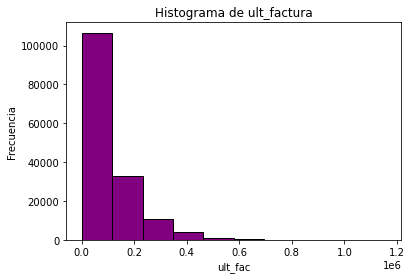

,ULT_FAC,PROM_FACTURA,VAL_FACTURADO,VALOR_PAGADO,CANT_FACTURAS,CANT_PAGOS,CANT_PAGOS_TIEMPO,CANT_PAGOS_MORA
count,155578.000000,155578.000000,1.555780e+05,1.555780e+05,155578.000000,155578.000000,155578.000000,155578.000000
mean,33084.510323,31974.888637,1.085355e+05,1.041506e+05,3.370399,3.242245,0.702259,0.976186
std,11402.846100,10164.974338,1.003821e+05,1.008414e+05,2.769056,2.798722,1.401870,1.691135
min,101.000000,700.000000,7.000000e+02,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,26251.000000,25000.000000,3.712500e+04,3.500000e+04,1.000000,1.000000,0.000000,0.000000
50%,33829.000000,31950.000000,7.100000e+04,6.999800e+04,2.000000,2.000000,0.000000,0.000000
75%,37500.000000,35500.000000,1.400000e+05,1.383960e+05,5.000000,4.000000,1.000000,1.000000
max,667499.000000,667499.000000,1.158500e+06,1.158500e+06,24.000000,24.000000,18.000000,17.000000


In [13]:
plt.hist(factu['VALOR_PAGADO'], bins=10, color='purple', edgecolor='black')
plt.xlabel('ult_fac')
plt.ylabel('Frecuencia')
plt.title('Histograma de ult_factura')
plt.show()
factu.describe()

In [2]:
#LLAMDAS COMPETENCIA 
query=f'''
WITH BASE AS(
SELECT SUBSCRIBER_ID
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.PERIODO_PROCESO_CODIGO=202309
AND A.SERVICIO='Postpaid'
AND A.MOVIMIENTO_TIPO_NOMBRE IN ('PERMANECE','GROSS ADDS NUEVA','GROSS ADDS PORTACION','GROSS ADDS MIGRACION')
AND A.SUBSCRIBER_ID IN(SELECT SUBSCRIBER_ID 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.SERVICIO='Postpaid'
AND A.MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
))
),
COMPETENCIA AS (
SELECT SUBSCRIBER_ID,
       COUNT(*) AS LLAMADAS_COMPETENCIA,
       ROUND(SUM(DURACION_SEG)/60,0) AS MIN_LLAMADAS_COMPETENCIA
FROM CDR_BODEGA_WOM.AGR_TRAFICO_MOU_COMPETENCIA
WHERE TIPO_TRAFICO='Postpaid'
AND OPERADOR !='WOM'
AND SUBSCRIBER_ID IN (
SELECT SUBSCRIBER_ID
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.PERIODO_PROCESO_CODIGO=202309
AND A.SERVICIO='Postpaid'
AND A.MOVIMIENTO_TIPO_NOMBRE IN ('PERMANECE','GROSS ADDS NUEVA','GROSS ADDS PORTACION','GROSS ADDS MIGRACION')
AND A.SUBSCRIBER_ID IN (SELECT SUBSCRIBER_ID 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.SERVICIO='Postpaid'
AND A.MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
))
)
AND PERIODO_PROCESO_CODIGO BETWEEN 20230915 AND 20231031
AND DURACION_SEG>=120
GROUP BY SUBSCRIBER_ID
)
SELECT A.SUBSCRIBER_ID,
       COALESCE(B.LLAMADAS_COMPETENCIA,0) AS LLAMADAS_COMPETENCIA,
       COALESCE(B.MIN_LLAMADAS_COMPETENCIA,0) AS MIN_COMPETENCIA
FROM BASE A 
LEFT JOIN COMPETENCIA B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
'''
competencia=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql: 
WITH BASE AS(
SELECT SUBSCRIBER_ID
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.PERIODO_PROCESO_CODIGO=202309
AND A.SERVICIO='Postpaid'
AND A.MOVIMIENTO_TIPO_NOMBRE IN ('PERMANECE','GROSS ADDS NUEVA','GROSS ADDS PORTACION','GROSS ADDS MIGRACION')
AND A.SUBSCRIBER_ID IN(SELECT SUBSCRIBER_ID 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.SERVICIO='Postpaid'
AND A.MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
))
),
COMPETENCIA AS (
SELECT SUBSCRIBER_ID,
       COUNT(*) AS LLAMADAS_COMPETENCIA,
       ROUND(SUM(DURACION_SEG)/60,0) AS MIN_LLAMADAS_COMPETENCIA
FROM CDR_BODEGA_WOM.AGR_TRAFICO_MOU_COMPETENCIA
WHERE TIPO_TRAFICO='Postpaid'
AND OPERADOR !='WOM'
AND SUBSCRIBER_ID IN (
SELECT SUBSCRIBER_ID
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.PERIODO_PROCESO_CODIGO=202309
AND A.SERVICIO='Postpaid'
AND A.MOVIMIENTO_TIPO_NOMBRE IN ('PERMANECE','GROSS ADDS NUEVA','GROSS ADDS PORTACION','GROSS ADDS MIGRACION')
AND A.SUBSCRIBER_ID IN (SELECT SUBSCRIBER_ID 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
WHERE A.SERVICIO='Postpaid'
AND A.MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)>=4)
))
)
AND PERIODO_PROCESO_CODIGO BETWEEN 20230915 AND 20231031
AND DURACION_SEG>=120
GROUP BY SUBSCRIBER_ID
)
SELECT A.SUBSCRIBER_ID,
       COALESCE(B.LLAMADAS_COMPETENCIA,0) AS LLAMADAS_COMPETENCIA,
       COALESCE(B.MIN_LLAMADAS_COMPETENCIA,0) AS MIN_COMPETENCIA
FROM BASE A 
LEFT JOIN COMPETENCIA B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID

DPI-1080: connection was closed by ORA-3113
unable to rollback

In [ ]:
#ANALISIS ANTIGUEDAD 
query=f'''
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROUND((TO_DATE(20231017,'YYYY/MM/DD')-CREATED_DATE)/30,0) AS ANTIGUEDAD,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=1)
) 
'''

In [ ]:
#BASE PARA TABLA
query=f'''
WITH BASE AS (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROUND((TO_DATE(20231017,'YYYY/MM/DD')-CREATED_DATE)/30,0) AS ANTIGUEDAD,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=1)
) )
,
BASE2 AS (
SELECT * FROM (
SELECT MSISDN,
       1 AS BASE_WOM,
       PERIODO_PROCESO_CODIGO,
       MOVIMIENTO_NOMBRE,
       ROW_NUMBER() OVER(PARTITION BY MSISDN ORDER BY PERIODO_PROCESO_CODIGO DESC) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=1))
) WHERE RN=1
)

SELECT A.PORT_NUMBER,
       CASE 
            WHEN A.ANTIGUEDAD<=1 THEN '1'
            WHEN A.ANTIGUEDAD=2 THEN '2'
            WHEN A.ANTIGUEDAD=3 THEN '3'
            WHEN A.ANTIGUEDAD BETWEEN 4 AND 6 THEN '4-6'
            WHEN A.ANTIGUEDAD >6 THEN '>6'
       END AS ANTIGUEDAD ,
       COALESCE(B.BASE_WOM,0) AS BASE_WOM,
       CASE
            WHEN B.PERIODO_PROCESO_CODIGO IN (202310,202309) AND B.MOVIMIENTO_NOMBRE IN ('PERMANECE','ACTIVACION') THEN 'ACTIVO'
            ELSE 'INACTIVO'
       END AS ACTIVO_WOM 
FROM BASE A 
LEFT JOIN BASE2 B ON A.PORT_NUMBER=B.MSISDN
'''

In [ ]:
#ORDEN 2 TABLA
query=f'''
WITH BASE AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=2)
) )WHERE ORDEN=1 ) 
,
BASE2 AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROUND((TO_DATE(20231017,'YYYY/MM/DD')-CREATED_DATE)/30,0) AS ANTIGUEDAD2,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=2)
) ) WHERE ORDEN=2),
BASE3 AS (
SELECT * FROM (
SELECT MSISDN,
       1 AS BASE_WOM,
       PERIODO_PROCESO_CODIGO,
       MOVIMIENTO_NOMBRE,
       ROW_NUMBER() OVER(PARTITION BY MSISDN ORDER BY PERIODO_PROCESO_CODIGO DESC) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=2))
) WHERE RN=1
)

SELECT A.PORT_NUMBER,
       CASE 
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+B.ANTIGUEDAD2)/2,0)<=1 THEN '1'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+B.ANTIGUEDAD2)/2,0)=2 THEN '2'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+B.ANTIGUEDAD2)/2,0)=3 THEN '3'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+B.ANTIGUEDAD2)/2,0) BETWEEN 4 AND 6 THEN '4-6'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+B.ANTIGUEDAD2)/2,0) >6 THEN '>6'
       END AS ANTIGUEDAD ,
       COALESCE(C.BASE_WOM,0) AS BASE_WOM,
       CASE
            WHEN C.PERIODO_PROCESO_CODIGO IN (202310,202309) AND C.MOVIMIENTO_NOMBRE IN ('PERMANECE','ACTIVACION') THEN 'ACTIVO'
            ELSE 'INACTIVO'
       END AS ACTIVO_WOM 
FROM BASE A 
LEFT JOIN BASE2 B ON A.PORT_NUMBER=B.PORT_NUMBER
LEFT JOIN BASE3 C ON A.PORT_NUMBER=C.MSISDN
'''

In [ ]:
#QUERY DE 3 
query=f'''
WITH BASE AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=3)
) )WHERE ORDEN=1 ) 
,
BASE2 AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=3)
) ) WHERE ORDEN=2),
BASE3 AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       ROUND((TO_DATE(20231017,'YYYY/MM/DD')-CREATED_DATE)/30,0) AS ANTIGUEDAD3,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE) AS ORDEN
FROM TEMP_JINETEROS
WHERE CREATED_DATE IS NOT NULL 
AND PORT_NUMBER IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=3)
) ) WHERE ORDEN=3),
BASE4 AS (
SELECT * FROM (
SELECT MSISDN,
       1 AS BASE_WOM,
       PERIODO_PROCESO_CODIGO,
       MOVIMIENTO_NOMBRE,
       ROW_NUMBER() OVER(PARTITION BY MSISDN ORDER BY PERIODO_PROCESO_CODIGO DESC) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING 
WHERE MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM TEMP_JINETEROS 
GROUP BY PORT_NUMBER
HAVING COUNT(*)=3))
) WHERE RN=1
)

SELECT ANTIGUEDAD,ACTIVO_WOM,COUNT(*) FROM (
SELECT A.PORT_NUMBER,
       CASE 
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+(C.CREATED_DATE-B.CREATED_DATE)/30+C.ANTIGUEDAD3)/3,0)<=1 THEN '1'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+(C.CREATED_DATE-B.CREATED_DATE)/30+C.ANTIGUEDAD3)/3,0)=2 THEN '2'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+(C.CREATED_DATE-B.CREATED_DATE)/30+C.ANTIGUEDAD3)/3,0)=3 THEN '3'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+(C.CREATED_DATE-B.CREATED_DATE)/30+C.ANTIGUEDAD3)/3,0) BETWEEN 4 AND 6 THEN '4-6'
            WHEN ROUND(((B.CREATED_DATE-A.CREATED_DATE)/30+(C.CREATED_DATE-B.CREATED_DATE)/30+C.ANTIGUEDAD3)/3,0) >6 THEN '>6'
       END AS ANTIGUEDAD ,
       COALESCE(D.BASE_WOM,0) AS BASE_WOM,
       CASE
            WHEN D.PERIODO_PROCESO_CODIGO IN (202310,202309) AND D.MOVIMIENTO_NOMBRE IN ('PERMANECE','ACTIVACION') THEN 'ACTIVO'
            ELSE 'INACTIVO'
       END AS ACTIVO_WOM 
FROM BASE A 
LEFT JOIN BASE2 B ON A.PORT_NUMBER=B.PORT_NUMBER
LEFT JOIN BASE3 C ON A.PORT_NUMBER=C.PORT_NUMBER
LEFT JOIN BASE4 D ON A.PORT_NUMBER=D.MSISDN
) GROUP BY ANTIGUEDAD,ACTIVO_WOM 

'''

In [ ]:
#ANTIGUEDAD ACTUAL PARA VER 
query=f'''
SELECT COUNT(*) FROM (
SELECT PORT_NUMBER,
       CREATED_DATE,
       OPERATOR_HOLDER,
       OPERATOR_DONOR,
       ROUND((TO_DATE(20231018,'YYYY/MM/DD')-CREATED_DATE)/30,1) AS ANTIGUEDAD_ACT,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE DESC) AS RN
FROM TEMP_JINETEROS
WHERE PORT_NUMBER IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
)
)
)WHERE RN=1
AND ANTIGUEDAD_ACT BETWEEN 3 AND 5
AND OPERATOR_HOLDER IN ('WOM')
'''

In [ ]:
####base especial para generar y mejorada agregarle veces de wom 
query=f'''
WITH BASE AS (
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTA FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
),
PRIMER_PORTA AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE AS PRIMER_PORTA,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE ) AS RN
FROM TEMP_JINETEROS
WHERE PORT_NUMBER IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
)
)
)WHERE RN=1
),
ULTIMA_PORTA AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE AS ULTIMA_PORTA,
       OPERATOR_HOLDER AS ULTIMO_DESTINO,
       OPERATOR_DONOR AS ULTIMO_ORIGEN,
       ROUND((TO_DATE(20231018,'YYYY/MM/DD')-CREATED_DATE)/30,1) AS ANTIGUEDAD_ACT,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE DESC) AS RN
FROM TEMP_JINETEROS
WHERE PORT_NUMBER IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) FROM TEMP_JINETEROS
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
)
)
)WHERE RN=1
)

SELECT A.PORT_NUMBER,
       A.VECES_PORTA,
       B.PRIMER_PORTA,
       C.ULTIMA_PORTA,
       C.ULTIMO_DESTINO,
       C.ULTIMO_ORIGEN,
       C.ANTIGUEDAD_ACT,
       ROUND((C.ULTIMA_PORTA-B.PRIMER_PORTA)/30/(A.VECES_PORTA-1),1) AS PROMEDIO_N_MENOS_1 
FROM BASE A 
LEFT JOIN PRIMER_PORTA B ON A.PORT_NUMBER=B.PORT_NUMBER
LEFT JOIN ULTIMA_PORTA C ON A.PORT_NUMBER=C.PORT_NUMBER
'''

In [2]:
query=f'''
select *
from COMERCIAL_WOM.PORT_PLAY_AS_OTHERS
WHERE PERIODO>=202201
'''
portacion_ext=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
portacion_ext.to_csv('portacion_ext.csv')

In [4]:
portacion_ext

,PERIODO,CREATED_DATE,PORT_NUMBER,OPERATOR_HOLDER,OPERATOR_DONOR
0,202201,2022-01-11 00:46:01,3205648635,COLOMBIA MOVIL S.A (TIGO),CLARO
1,202201,2022-01-25 01:03:14,3003647146,CLARO,COLOMBIA MOVIL S.A (TIGO)
2,202201,2022-01-27 00:52:46,3186233614,COLOMBIA MOVIL S.A (TIGO),CLARO
3,202201,2022-01-05 02:48:50,3112295927,CLARO,COLOMBIA MOVIL S.A (TIGO)
4,202201,2022-01-17 00:48:29,3126345038,COLOMBIA MOVIL S.A (TIGO),CLARO
...,...,...,...,...,...
11098651,202310,2023-10-02 04:57:16,3152206559,CLARO,MOVISTAR
11098652,202310,2023-10-09 00:53:00,3222033001,MOVISTAR,CLARO
11098653,202310,2023-10-13 00:55:41,3188524409,CLARO,MOVISTAR
11098654,202310,2023-10-05 00:56:49,3182422523,CLARO,MOVISTAR


In [2]:
#BASE PARA ALFONSO
query=f'''
SELECT DISTINCT(A.MSISDN) AS NUMERO,
       B.CLIENTE_NOMBRE,
       B.CLIENTE_NIT_CEDULA,
       'I' AS MARCACION,
       C.ANTIGUEDAD_ACT AS TIEMPO_PARAMETRIZACION
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
LEFT JOIN DWH_BODEGA_WOM.DIM_CLIENTES B ON A.CLIENTE_DK=B.CLIENTE_DK
LEFT JOIN JMARTINEZ_ANA.TBL_RULETEROS C ON A.MSISDN=C.PORT_NUMBER
WHERE A.MSISDN IN (SELECT PORT_NUMBER 
FROM JMARTINEZ_ANA.TBL_RULETEROS 
WHERE ACTIVO_WOM=0
AND BASE_WOM=1
AND ANTIGUEDAD_ACT<=4.5
AND PROMEDIO_N_MENOS_1<=4.5)
'''
base_alfonso=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql '
SELECT DISTINCT(A.MSISDN) AS NUMERO,
       B.CLIENTE_NOMBRE,
       B.CLIENTE_NIT_CEDULA,
       'I' AS MARCACION,
       C.ANTIGUEDAD_ACT AS TIEMPO_PARAMETRIZACION
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A
LEFT JOIN DWH_BODEGA_WOM.DIM_CLIENTES B ON A.CLIENTE_DK=B.CLIENTE_DK
LEFT JOIN JMARTINEZ_ANA.TBL_RULETEROS C ON A.MSISDN=C.PORT_NUMBER
WHERE A.MSISDN IN (SELECT PORT_NUMBER 
FROM JMARTINEZ_ANA.TBL_RULETEROS 
WHERE ACTIVO_WOM=0
AND BASE_WOM=1
AND ANTIGUEDAD_ACT<=4.5
AND PROMEDIO_N_MENOS_1<=4.5)
': ORA-00942: table or view does not exist

In [ ]:
#INSERTAS DATOS A LA TABLA
query=f'''
INSERT INTO JMARTINEZ_ANA.TBL_RULETEROS (
    -- Lista de columnas en la que deseas insertar datos
    PORT_NUMBER,
    VECES_PORTA,
    PRIMER_PORTA,
    ULTIMA_PORTA,
    ULTIMO_DESTINO,
    ULTIMO_ORIGEN,
    ANTIGUEDAD_ACT,
    PROMEDIO_N_MENOS_1,
    BASE_WOM,
    ACTIVO_WOM,
    PERIODO_PROCESO_CODIGO
)
WITH BASE AS (
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTA FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE CREATED_DATE<=TO_DATE(20231031,'YYYY/MM/DD')
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
),
PRIMER_PORTA AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE AS PRIMER_PORTA,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE ) AS RN
FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE PORT_NUMBER IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE CREATED_DATE<=TO_DATE(20231031,'YYYY/MM/DD')
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
)
)
)WHERE RN=1
),
ULTIMA_PORTA AS (
SELECT * FROM (
SELECT PORT_NUMBER,
       CREATED_DATE AS ULTIMA_PORTA,
       OPERATOR_HOLDER AS ULTIMO_DESTINO,
       OPERATOR_DONOR AS ULTIMO_ORIGEN,
       ROUND((TO_DATE(20231031,'YYYY/MM/DD')-CREATED_DATE)/30,1) AS ANTIGUEDAD_ACT,
       ROW_NUMBER() OVER(PARTITION BY PORT_NUMBER ORDER BY CREATED_DATE DESC) AS RN
FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE PORT_NUMBER IN (
SELECT PORT_NUMBER FROM (
SELECT PORT_NUMBER,COUNT(*) FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE CREATED_DATE<=TO_DATE(20231031,'YYYY/MM/DD')
GROUP BY PORT_NUMBER HAVING COUNT(*)>=3
)
)
)WHERE RN=1
)
,
BASE_WOM AS (
SELECT * FROM (
SELECT MSISDN,
       1 AS BASE_WOM,
       PERIODO_PROCESO_CODIGO,
       MOVIMIENTO_NOMBRE,
       ROW_NUMBER() OVER(PARTITION BY MSISDN ORDER BY PERIODO_PROCESO_CODIGO DESC) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING 
WHERE PERIODO_PROCESO_CODIGO<=202310
AND MSISDN IN (
SELECT PORT_NUMBER FROM(
SELECT PORT_NUMBER,COUNT(*) AS VECES_PORTADO 
FROM YVANEGAS_PLAC.PORT_PLAY_AS_OTHERS
WHERE CREATED_DATE<=TO_DATE(20231031,'YYYY/MM/DD')
GROUP BY PORT_NUMBER
HAVING COUNT(*)=3))
) WHERE RN=1
)


-- La parte final de tu consulta que selecciona datos de las expresiones comunes
SELECT 
    A.PORT_NUMBER,
    A.VECES_PORTA,
    B.PRIMER_PORTA,
    C.ULTIMA_PORTA,
    C.ULTIMO_DESTINO,
    C.ULTIMO_ORIGEN,
    C.ANTIGUEDAD_ACT,
    ROUND((C.ULTIMA_PORTA-B.PRIMER_PORTA)/30/(A.VECES_PORTA-1),1) AS PROMEDIO_N_MENOS_1,
    COALESCE(D.BASE_WOM,0) AS BASE_WOM,
    CASE
        WHEN D.MOVIMIENTO_NOMBRE IN ('PERMANECE','ACTIVACION') THEN 1
        ELSE 0 
    END AS ACTIVO_WOM,
    202310
FROM BASE A 
LEFT JOIN PRIMER_PORTA B ON A.PORT_NUMBER=B.PORT_NUMBER
LEFT JOIN ULTIMA_PORTA C ON A.PORT_NUMBER=C.PORT_NUMBER
LEFT JOIN BASE_WOM D ON A.PORT_NUMBER=D.MSISDN
'''

In [8]:
#migracion 
query=f'''
SELECT SUBSCRIBER_ID,ROUND(ROUND(TO_DATE(20231201,'YYYY/MM/DD')-FECHA_ALTA,0)/30,1) AS ANTIGUEDAD 
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING A 
WHERE PERIODO_PROCESO_CODIGO=202311
AND MOVIMIENTO_NOMBRE IN ('ACTIVACION','PERMANECE')
AND SUBSCRIBER_ID IN ( SELECT SUBSCRIBER_ID FROM (
SELECT SUBSCRIBER_ID,COUNT(*) AS VECES_MIGRADO
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE PERIODO_PROCESO_CODIGO>=202201
AND MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS MIGRACION')
GROUP BY SUBSCRIBER_ID
HAVING COUNT(*)>=3))
'''
antiguedad_jin_activo=cst.consulta(query)

c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [24]:
import pandas as pd

# Especifica la ruta del archivo Excel si no está en el mismo directorio
# Por ejemplo, si está en un directorio llamado "datos", la ruta sería "datos/ANTIGUEDAD_MIGRA.xlsx"
ruta_archivo_excel = "ANTIGUEDAD_MIGRA2.xlsx"

# Lee el archivo Excel con Pandas
antiguedad_jin_activo = pd.read_excel(ruta_archivo_excel)

# Muestra las primeras filas del DataFrame para verificar que se ha leído correctamente
print(antiguedad_jin_activo.head())




c:\Users\HP EliteBook 840 G3\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


   ANTIGUEDAD
0         2.8
1         2.0
2         4.1
3         8.3
4         4.0


In [25]:
antiguedad_jin_activo=antiguedad_jin_activo.dropna()

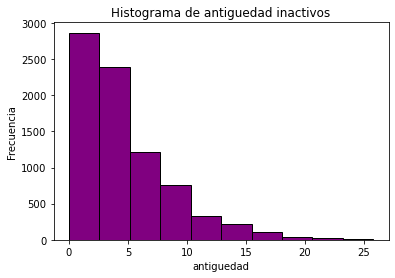

,ANTIGUEDAD
count,7961.000000
mean,4.770104
std,3.910516
min,0.000000
25%,2.000000
50%,3.700000
75%,6.400000
max,25.800000


In [26]:
plt.hist(antiguedad_jin_activo['ANTIGUEDAD'], bins=10, color='purple', edgecolor='black')
plt.xlabel('antiguedad')
plt.ylabel('Frecuencia')
plt.title('Histograma de antiguedad inactivos')
plt.show()
antiguedad_jin_activo.describe()

In [ ]:
#ANALSIIS DE LAS MIGRA
query=f'''
WITH BASE AS (
SELECT SUBSCRIBER_ID,COUNT(*) AS VECES_MIGRADO
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE PERIODO_PROCESO_CODIGO>=202201
AND MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS MIGRACION')
GROUP BY SUBSCRIBER_ID
HAVING COUNT(*)>=3),
PRIMER_MIGRA AS (
SELECT * FROM (
SELECT SUBSCRIBER_ID,
       FECHA_ALTA AS PRIMER_MIGRA,
       ROW_NUMBER() OVER(PARTITION BY SUBSCRIBER_ID ORDER BY FECHA_ALTA ) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE SUBSCRIBER_ID IN (
SELECT SUBSCRIBER_ID FROM (
SELECT SUBSCRIBER_ID,COUNT(*) AS VECES_MIGRADO
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE PERIODO_PROCESO_CODIGO>=202201
AND MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS MIGRACION')
GROUP BY SUBSCRIBER_ID
HAVING COUNT(*)>=3)
)
)WHERE RN=1
),
ULTIMA_MIGRA AS (
SELECT * FROM (
SELECT SUBSCRIBER_ID,
       FECHA_ALTA AS ULTIMA_MIGRA,
        ROUND((TO_DATE(20231201,'YYYY/MM/DD')-FECHA_ALTA)/30,1) AS ANTIGUEDAD_ACT,
       ROW_NUMBER() OVER(PARTITION BY SUBSCRIBER_ID ORDER BY FECHA_ALTA DESC ) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE SUBSCRIBER_ID IN (
SELECT SUBSCRIBER_ID FROM (
SELECT SUBSCRIBER_ID,COUNT(*) AS VECES_MIGRADO
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE PERIODO_PROCESO_CODIGO>=202201
AND MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS MIGRACION')
GROUP BY SUBSCRIBER_ID
HAVING COUNT(*)>=3)
)
)WHERE RN=1
),
BASE_WOM AS (
SELECT * FROM (
SELECT SUBSCRIBER_ID,
       MSISDN, 
       1 AS BASE_WOM,
       PERIODO_PROCESO_CODIGO,
       MOVIMIENTO_NOMBRE,
       ROW_NUMBER() OVER(PARTITION BY SUBSCRIBER_ID ORDER BY PERIODO_PROCESO_CODIGO DESC) AS RN
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING 
WHERE PERIODO_PROCESO_CODIGO<=202311
AND SUBSCRIBER_ID IN (
SELECT SUBSCRIBER_ID FROM (
SELECT SUBSCRIBER_ID,COUNT(*) AS VECES_MIGRADO
FROM DWH_BODEGA_WOM.FCT_SUBSCRIBERS_ENDING
WHERE PERIODO_PROCESO_CODIGO>=202201
AND MOVIMIENTO_TIPO_NOMBRE IN ('GROSS ADDS MIGRACION')
GROUP BY SUBSCRIBER_ID
HAVING COUNT(*)>=3)
)) WHERE RN=1
)

SELECT 
    A.SUBSCRIBER_ID,
    D.MSISDN,
    A.VECES_MIGRADO,
    B.PRIMER_MIGRA,
    C.ULTIMA_MIGRA,
    C.ANTIGUEDAD_ACT,
    ROUND((C.ULTIMA_MIGRA-B.PRIMER_MIGRA)/30/(A.VECES_MIGRADO-1),1) AS PROMEDIO_N_MENOS_1,
    COALESCE(D.BASE_WOM,0) AS BASE_WOM,
    CASE
        WHEN D.MOVIMIENTO_NOMBRE IN ('PERMANECE','ACTIVACION') THEN 1
        ELSE 0 
    END AS ACTIVO_WOM,
    202311
FROM BASE A 
LEFT JOIN PRIMER_MIGRA B ON A.SUBSCRIBER_ID=B.SUBSCRIBER_ID
LEFT JOIN ULTIMA_MIGRA C ON A.SUBSCRIBER_ID=C.SUBSCRIBER_ID
LEFT JOIN BASE_WOM D ON A.SUBSCRIBER_ID=D.SUBSCRIBER_ID

'''
antiguedad_jin_inactivo=cst.consulta(query)